# Problem 1: Least Squares Problem

In [24]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import random
from importlib import reload
import methods
methods = reload(methods)
from methods import AccelPDA, UniAdaGrad, UniXGrad, AdaGrad

# Generating data
n = 500
d = 10
r = 1
A = np.random.normal(0, 1, (n, d))
#x_star = np.random.choice([-1, 1], d) * r / np.sqrt(d)
x_star = np.ones(d) * r / np.sqrt(d)
b = A @ x_star
print('x_star_norm:', np.linalg.norm(x_star))

# Function for calculating cost
def cost(x):
    f = np.linalg.norm(A @ x - b)**2 / (2*n)
    return f

# Function for calculating gradients
def grad(x, random_ind):
    batch_size = len(random_ind)
    c = np.dot(A[random_ind], x) - b[random_ind]
    c2 = np.dot(c.T,A[random_ind])
    final_grad = (c2)/(batch_size)
    return final_grad

print('grad(x_star):', grad(x_star, range(n)))

# Parameters for methods
D_AccelPDA = 2*r
D_UniXGrad = np.sqrt(2) * r
D_AdaGrad = 2*r
R = 4 * r**2 
x0 = np.zeros(d)
y0 = np.zeros(d)
f_star = cost(x_star)
L = np.max(la.eigvalsh(A.T @ A))/n

x_star_norm: 0.9999999999999999
grad(x_star): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Mini-batch size: n

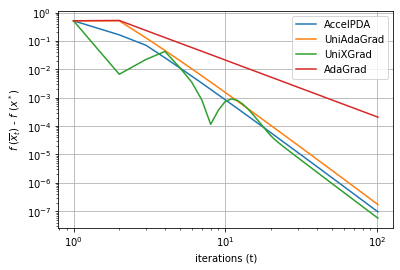

In [14]:
#Parameters
T = 100
alpha = [i for i in range(T+2)]
t = [i+1 for i in range(T+1)]
eta = 0

#batches
batch_size = n
batch = []
for i in range(T+1): batch.append(random.sample(range(n), batch_size))

# Running the algorithms
x_aver_AccelPDA, f_AccelPDA = AccelPDA(cost, grad, x0, T, d, batch, alpha, D_AccelPDA, L, eta, r)
x_aver_UniAdaGrad, f_UniAdaGrad = UniAdaGrad(cost, grad, x0, T, d, batch, alpha, r, R)
x_aver_AdaGrad, f_AdaGrad = AdaGrad(cost, grad, x0, T, d, batch, D_AdaGrad, r)
x_aver_UniXGrad, f_UniXGrad = UniXGrad(cost, grad, y0, T, d, batch, alpha, r, D_UniXGrad)

# Plotting
plt.loglog(t, f_AccelPDA - f_star, label='AccelPDA')
plt.loglog(t, f_UniAdaGrad - f_star, label='UniAdaGrad')
plt.loglog(t, f_UniXGrad - f_star, label='UniXGrad')
plt.loglog(t, f_AdaGrad - f_star, label='AdaGrad')
plt.xlabel('iterations (t)')
plt.ylabel('$f \ (\overline{x}_t)$ - $f \ (x^*)$')
#plt.title('m=n')
plt.legend()
plt.grid(True)
plt.savefig('res/exp_1_1.pdf', format='pdf')

Mini-batch size: n/10

x1_norm:  1.076572007065369


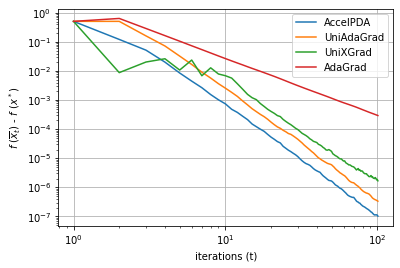

In [16]:
#Parameters
T = 100
batch_size = int(n/10)
alpha = [i for i in range(T+2)]
t = [i+1 for i in range(T+1)]
x1 = np.random.rand(d) / 2
print('x1_norm: ', np.linalg.norm(x1))
eta = np.linalg.norm(grad(x1,range(n)) - grad(x1,random.sample(range(n), batch_size)))**2 / D_AccelPDA**2

#batches
batch = []
for i in range(T+1): batch.append(random.sample(range(n), batch_size))

# Running the algorithms
x_aver_AccelPDA, f_AccelPDA = AccelPDA(cost, grad, x0, T, d, batch, alpha, D_AccelPDA, L, eta, r)
x_aver_UniAdaGrad, f_UniAdaGrad = UniAdaGrad(cost, grad, x0, T, d, batch, alpha, r, R)
x_aver_AdaGrad, f_AdaGrad = AdaGrad(cost, grad, x0, T, d, batch, D_AdaGrad, r)
x_aver_UniXGrad, f_UniXGrad = UniXGrad(cost, grad, y0, T, d, batch, alpha, r, D_UniXGrad)

# Plotting
plt.loglog(t, f_AccelPDA - f_star, label='AccelPDA')
plt.loglog(t, f_UniAdaGrad - f_star, label='UniAdaGrad')
plt.loglog(t, f_UniXGrad - f_star, label='UniXGrad')
plt.loglog(t, f_AdaGrad - f_star, label='AdaGrad')
plt.xlabel('iterations (t)')
plt.ylabel('$f \ (\overline{x}_t)$ - $f \ (x^*)$')
#plt.title('m=n/10')
plt.legend()
plt.grid(True)
plt.savefig('res/exp_1_2.pdf', format='pdf')